##**Importing Libraries**


In [31]:
from google.colab import drive
drive.mount('/content/drive/')
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **Importing Input Data**

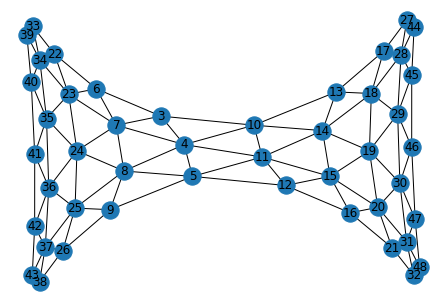

In [32]:
data_file = pd.read_csv('/content/drive/MyDrive/CT_Project/big_graph.csv') 
G = nx.Graph()
for i in range(len(data_file)):
  G.add_edge(data_file['F'][i],data_file['T'][i])

nx.draw_spectral(G, with_labels=True)

## **Input data with unlabelled and labelled vertices**

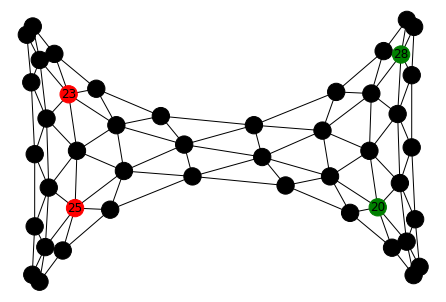

In [33]:
color_of_node=[]
all_classes = ['red', 'green']
no_of_classes = len(all_classes)

for n in list(G.nodes):
  if n==23 or n==25:
    color_of_node.append('red')
  elif n==28 or n==20 :
    color_of_node.append('green')
  else:
    color_of_node.append('black')

nx.draw_spectral(G, node_color=color_of_node, with_labels = True)
plt.show()

## **Calculating Laplacian Matrices L0**

In [34]:
all_nodes = list(G.nodes)
vertices = np.array(G.nodes)
print("Vector of vertices : ",all_nodes)

edge = G.edges
print("\nVector of edges: ",edge)

n = len(all_nodes)

degree = [val for (node,val) in G.degree()]

L = np.zeros((n,n))

k = 0
for i in range(len(all_nodes)):
  for j in range(len(all_nodes)):
    x = vertices[i]
    y = vertices[j]
    if i==j:
      L[i][j] = degree[i] 

    elif G.has_edge(x,y) == True or G.has_edge(y,x)==True:
      L[i][j] = -1

Vector of vertices :  [5, 12, 11, 4, 10, 3, 6, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 20, 21, 27, 28, 29, 30, 31, 32, 44, 45, 46, 47, 48, 22, 23, 24, 25, 26, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

Vector of edges:  [(5, 12), (5, 11), (5, 8), (5, 9), (5, 4), (12, 15), (12, 16), (12, 11), (11, 4), (11, 14), (11, 15), (11, 10), (4, 10), (4, 7), (4, 8), (4, 3), (10, 3), (10, 13), (10, 14), (3, 6), (3, 7), (6, 7), (6, 22), (6, 23), (7, 8), (7, 23), (7, 24), (8, 9), (8, 25), (8, 24), (9, 26), (9, 25), (13, 14), (13, 17), (13, 18), (14, 15), (14, 19), (14, 18), (15, 16), (15, 19), (15, 20), (16, 21), (16, 20), (17, 18), (17, 27), (17, 28), (18, 19), (18, 28), (18, 29), (19, 20), (19, 29), (19, 30), (20, 21), (20, 30), (20, 31), (21, 31), (21, 32), (27, 28), (27, 44), (28, 29), (28, 44), (28, 45), (29, 30), (29, 45), (29, 46), (30, 31), (30, 46), (30, 47), (31, 32), (31, 47), (31, 48), (32, 48), (44, 45), (45, 46), (46, 47), (47, 48), (22, 23), (22, 33), (22, 34), (23, 24), (23, 34), (23, 

## **Calculating D_L and Inverse of D_L matrices**

In [35]:
D_L = np.zeros((n,n))
for i in range(n):
  D_L[i][i] = L[i][i]

D_L_inv = np.linalg.inv(D_L)

L_mult_D_L_inv = np.dot(L, D_L_inv)

### **Calculating Value of K**

In [36]:
temp_arr = []
for i in range(n):
  var = 0
  for j in range(n):
    x = vertices[i]
    y = vertices[j]
    if i!=j and (G.has_edge(x,y) or G.has_edge(y,x)):
      var += np.abs((L_mult_D_L_inv.T)[i][j])
  temp_arr.append(var)

K = max(temp_arr)
print(K)

1.0


## **Calculating A_cap Matrix**

In [37]:
p = 0.5

one_minus_p = 1 - p
den = p*(K - 1) + 1

A_cap = np.identity(n)*(1/K)  - np.array(L_mult_D_L_inv) * (one_minus_p/K)
print(A_cap.shape)

(46, 46)


## **Randomly initializing Confidence Function(f_c)**

In [38]:
f_c_matrix = np.zeros((n,no_of_classes))

for i in range(len(all_nodes)):
  rand_array = np.random.random(no_of_classes)
  for c in range(no_of_classes):
    f_c_matrix[i][c] = rand_array[c]

f_c_matrix[all_nodes.index(25)][all_classes.index('red')], f_c_matrix[all_nodes.index(25)][all_classes.index('green')] = 1, 0 
f_c_matrix[all_nodes.index(23)][all_classes.index('red')], f_c_matrix[all_nodes.index(23)][all_classes.index('green')] = 1, 0
f_c_matrix[all_nodes.index(20)][all_classes.index('red')], f_c_matrix[all_nodes.index(20)][all_classes.index('green')] = 0, 1
f_c_matrix[all_nodes.index(28)][all_classes.index('red')], f_c_matrix[all_nodes.index(28)][all_classes.index('green')] = 0, 1 
# f_c_matrix[all_nodes.index(20)][all_classes.index('red')], f_c_matrix[all_nodes.index(20)][all_classes.index('green')], f_c_matrix[all_nodes.index(20)][all_classes.index('yellow')] = 0, 1, 0 
# f_c_matrix[all_nodes.index(1)][all_classes.index('red')], f_c_matrix[all_nodes.index(1)][all_classes.index('green')], f_c_matrix[all_nodes.index(1)][all_classes.index('yellow')] = 0, 0, 1 

## **Implementing Edge Propagation Algorithm**

In [39]:
for i in range(10):
  for c in range(no_of_classes):
    f_c_matrix[:,c] = np.dot(A_cap,f_c_matrix[:,c])
  f_c_matrix[all_nodes.index(25)][all_classes.index('red')], f_c_matrix[all_nodes.index(25)][all_classes.index('green')] = 1, 0 
  f_c_matrix[all_nodes.index(23)][all_classes.index('red')], f_c_matrix[all_nodes.index(23)][all_classes.index('green')] = 1, 0
  f_c_matrix[all_nodes.index(20)][all_classes.index('red')], f_c_matrix[all_nodes.index(20)][all_classes.index('green')] = 0, 1
  f_c_matrix[all_nodes.index(28)][all_classes.index('red')], f_c_matrix[all_nodes.index(28)][all_classes.index('green')] = 0, 1 

  # f_c_matrix[all_nodes.index(25)][all_classes.index('red')], f_c_matrix[all_nodes.index(25)][all_classes.index('green')] = 1, 0 
  # f_c_matrix[all_nodes.index(28)][all_classes.index('red')], f_c_matrix[all_nodes.index(28)][all_classes.index('green')] = 0, 1 


## **Printing Output**

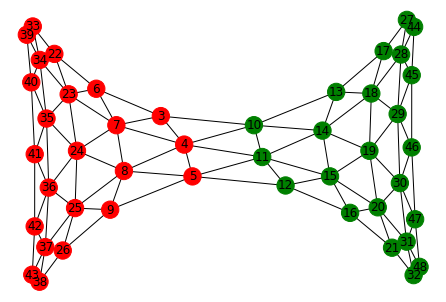

In [40]:
color_of_node=[]
for i in range(len(all_nodes)):
  color_index = np.argmax(f_c_matrix[i])
  color_of_node.append(all_classes[color_index])

nx.draw_spectral(G, node_color=color_of_node, with_labels= True)
plt.show()